In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.model_selection import KFold
# from feature_selection_lofo import lofo
from lofo import LOFOImportance, FLOFOImportance, Dataset, plot_importance
from sklearn.metrics import make_scorer, mean_squared_log_error

/Users/maksimegorov/PythonProjects/contest_22/venv/lib/python3.11/site-packages/lofo/lofo_importance.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
train_df = pd.read_csv('data/train.csv').drop(columns=['id'])
test_df = pd.read_csv('data/test.csv')
test_id = test_df.id
test_df = test_df.drop(columns=['id'])

train_df

store_sales(in millions)  unit_sales(in millions)  total_children  \
0                           8.61                      3.0             2.0   
1                           5.00                      2.0             4.0   
2                          14.08                      4.0             0.0   
3                           4.02                      3.0             5.0   
4                           2.13                      3.0             5.0   
...                          ...                      ...             ...   
360331                      7.60                      4.0             5.0   
360332                     14.44                      4.0             4.0   
360333                     10.74                      3.0             0.0   
360334                     11.04                      3.0             1.0   
360335                      5.30                      2.0             2.0   

        num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                        2.0                         2.0         10.30   
1                        0.0                         3.0          6.66   
2                        0.0                         3.0         21.30   
3                        0.0                         0.0         14.80   
4                        0.0                         3.0         17.00   
...                      ...                         ...           ...   
360331                   5.0                         3.0         13.50   
360332                   0.0                         4.0         18.80   
360333                   0.0                         2.0         11.30   
360334                   0.0                         3.0         10.20   
360335                   0.0                         2.0         10.80   

        recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                      1.0      0.0            32.0     36509.0         0.0   
1                      1.0      0.0             1.0     28206.0         1.0   
2                      1.0      0.0            26.0     21215.0         1.0   
3                      0.0      1.0            36.0     21215.0         1.0   
4                      1.0      1.0            20.0     27694.0         1.0   
...                    ...      ...             ...         ...         ...   
360331                 1.0      0.0            33.0     30268.0         0.0   
360332                 1.0      1.0            18.0     20319.0         0.0   
360333                 1.0      0.0            35.0     30584.0         1.0   
360334                 0.0      1.0            14.0     30584.0         1.0   
360335                 0.0      0.0            21.0     33858.0         1.0   

        video_store  salad_bar  prepared_food  florist    cost  
0               0.0        0.0            0.0      0.0   62.09  
1               0.0        0.0            0.0      0.0  121.80  
2               0.0        0.0            0.0      0.0   83.51  
3               0.0        0.0            0.0      0.0   66.78  
4               1.0        1.0            1.0      1.0  111.51  
...             ...        ...            ...      ...     ...  
360331          0.0        0.0            0.0      0.0  133.42  
360332          0.0        0.0            0.0      0.0   81.85  
360333          1.0        1.0            1.0      1.0   87.07  
360334          1.0        1.0            1.0      1.0  146.72  
360335          0.0        1.0            1.0      1.0  122.47  

[360336 rows x 16 columns]

In [4]:
cv = KFold(n_splits=8, shuffle=True, random_state=1)
scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

dataset = Dataset(
    df=train_df.sample(frac=0.2, random_state=1),
    target="cost",
    features=[col for col in train_df.columns if col != "cost" and col != "salad_bar"]
)

# model
cat = CatBoostRegressor(random_state=0)

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring=scorer, model=cat)

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

Learning rate set to 0.078802
0:	learn: 29.8798023	total: 57.9ms	remaining: 57.9s
1:	learn: 29.7936717	total: 62.8ms	remaining: 31.3s
2:	learn: 29.7039021	total: 69ms	remaining: 22.9s
3:	learn: 29.6309376	total: 73.5ms	remaining: 18.3s
4:	learn: 29.5656909	total: 77ms	remaining: 15.3s
5:	learn: 29.5139270	total: 80.6ms	remaining: 13.3s
6:	learn: 29.4728650	total: 84ms	remaining: 11.9s
7:	learn: 29.4370540	total: 88ms	remaining: 10.9s
8:	learn: 29.4086161	total: 91.2ms	remaining: 10s
9:	learn: 29.3671932	total: 95.1ms	remaining: 9.41s
10:	learn: 29.3393304	total: 98.5ms	remaining: 8.85s
11:	learn: 29.3137880	total: 102ms	remaining: 8.4s
12:	learn: 29.2954188	total: 105ms	remaining: 7.96s
13:	learn: 29.2745496	total: 108ms	remaining: 7.59s
14:	learn: 29.2502474	total: 111ms	remaining: 7.31s
15:	learn: 29.2326223	total: 114ms	remaining: 7.02s
16:	learn: 29.2127482	total: 117ms	remaining: 6.78s
17:	learn: 29.1943498	total: 120ms	remaining: 6.56s
18:	learn: 29.1738936	total: 123ms	remaining

  0%|          | 0/14 [00:00<?, ?it/s]

Learning rate set to 0.078802
0:	learn: 29.8652028	total: 3.12ms	remaining: 3.12s
1:	learn: 29.7647880	total: 5.79ms	remaining: 2.89s
2:	learn: 29.6872024	total: 9.08ms	remaining: 3.02s
3:	learn: 29.6211717	total: 12.1ms	remaining: 3.02s
4:	learn: 29.5548766	total: 15.2ms	remaining: 3.02s
5:	learn: 29.5063109	total: 18ms	remaining: 2.97s
6:	learn: 29.4587793	total: 20.8ms	remaining: 2.94s
7:	learn: 29.4186119	total: 23.4ms	remaining: 2.91s
8:	learn: 29.3867170	total: 26.2ms	remaining: 2.88s
9:	learn: 29.3546874	total: 28.9ms	remaining: 2.86s
10:	learn: 29.3292955	total: 31.8ms	remaining: 2.85s
11:	learn: 29.3053752	total: 34.5ms	remaining: 2.84s
12:	learn: 29.2768930	total: 37.2ms	remaining: 2.82s
13:	learn: 29.2574526	total: 40ms	remaining: 2.81s
14:	learn: 29.2437452	total: 42.5ms	remaining: 2.79s
15:	learn: 29.2245900	total: 45ms	remaining: 2.77s
16:	learn: 29.2075015	total: 47.6ms	remaining: 2.75s
17:	learn: 29.1906498	total: 50.6ms	remaining: 2.76s
18:	learn: 29.1788053	total: 53.

  7%|▋         | 1/14 [00:23<05:11, 23.98s/it]

956:	learn: 27.1690907	total: 2.58s	remaining: 116ms
957:	learn: 27.1677643	total: 2.58s	remaining: 113ms
958:	learn: 27.1660406	total: 2.59s	remaining: 111ms
959:	learn: 27.1649728	total: 2.59s	remaining: 108ms
960:	learn: 27.1640799	total: 2.59s	remaining: 105ms
961:	learn: 27.1628262	total: 2.6s	remaining: 103ms
962:	learn: 27.1617751	total: 2.6s	remaining: 99.8ms
963:	learn: 27.1604469	total: 2.6s	remaining: 97.1ms
964:	learn: 27.1594119	total: 2.6s	remaining: 94.4ms
965:	learn: 27.1582084	total: 2.6s	remaining: 91.7ms
966:	learn: 27.1568091	total: 2.61s	remaining: 89ms
967:	learn: 27.1555881	total: 2.61s	remaining: 86.3ms
968:	learn: 27.1544586	total: 2.61s	remaining: 83.6ms
969:	learn: 27.1533403	total: 2.62s	remaining: 80.9ms
970:	learn: 27.1526522	total: 2.62s	remaining: 78.2ms
971:	learn: 27.1513041	total: 2.62s	remaining: 75.5ms
972:	learn: 27.1503831	total: 2.62s	remaining: 72.8ms
973:	learn: 27.1487984	total: 2.63s	remaining: 70.1ms
974:	learn: 27.1473629	total: 2.63s	remai

 14%|█▍        | 2/14 [00:47<04:47, 23.95s/it]

999:	learn: 27.1223842	total: 2.79s	remaining: 0us
Learning rate set to 0.078802
0:	learn: 29.8850631	total: 3.28ms	remaining: 3.27s
1:	learn: 29.7928824	total: 6.11ms	remaining: 3.05s
2:	learn: 29.7167838	total: 9ms	remaining: 2.99s
3:	learn: 29.6426557	total: 11.8ms	remaining: 2.94s
4:	learn: 29.5878915	total: 14.9ms	remaining: 2.96s
5:	learn: 29.5399923	total: 17.9ms	remaining: 2.97s
6:	learn: 29.4951328	total: 20.7ms	remaining: 2.93s
7:	learn: 29.4577569	total: 23.5ms	remaining: 2.91s
8:	learn: 29.4236445	total: 26.3ms	remaining: 2.9s
9:	learn: 29.3934037	total: 29ms	remaining: 2.87s
10:	learn: 29.3665960	total: 32ms	remaining: 2.87s
11:	learn: 29.3376415	total: 34.6ms	remaining: 2.85s
12:	learn: 29.3162180	total: 37.2ms	remaining: 2.82s
13:	learn: 29.2949516	total: 40.1ms	remaining: 2.82s
14:	learn: 29.2705375	total: 42.7ms	remaining: 2.81s
15:	learn: 29.2522586	total: 45.7ms	remaining: 2.81s
16:	learn: 29.2340102	total: 49.8ms	remaining: 2.88s
17:	learn: 29.2203313	total: 52.6ms	

 21%|██▏       | 3/14 [01:11<04:21, 23.78s/it]

971:	learn: 27.1529795	total: 2.87s	remaining: 82.5ms
972:	learn: 27.1519234	total: 2.87s	remaining: 79.6ms
973:	learn: 27.1503678	total: 2.87s	remaining: 76.6ms
974:	learn: 27.1494350	total: 2.87s	remaining: 73.7ms
975:	learn: 27.1479597	total: 2.88s	remaining: 70.7ms
976:	learn: 27.1459930	total: 2.88s	remaining: 67.8ms
977:	learn: 27.1449735	total: 2.88s	remaining: 64.9ms
978:	learn: 27.1435402	total: 2.89s	remaining: 62ms
979:	learn: 27.1423701	total: 2.9s	remaining: 59.2ms
980:	learn: 27.1411042	total: 2.91s	remaining: 56.3ms
981:	learn: 27.1401901	total: 2.91s	remaining: 53.3ms
982:	learn: 27.1395210	total: 2.91s	remaining: 50.4ms
983:	learn: 27.1387774	total: 2.92s	remaining: 47.4ms
984:	learn: 27.1374877	total: 2.92s	remaining: 44.4ms
985:	learn: 27.1360244	total: 2.92s	remaining: 41.5ms
986:	learn: 27.1347384	total: 2.92s	remaining: 38.5ms
987:	learn: 27.1333658	total: 2.92s	remaining: 35.5ms
988:	learn: 27.1325655	total: 2.93s	remaining: 32.6ms
989:	learn: 27.1314570	total: 2

 29%|██▊       | 4/14 [01:34<03:56, 23.63s/it]

960:	learn: 27.2851872	total: 2.59s	remaining: 105ms
961:	learn: 27.2835829	total: 2.59s	remaining: 102ms
962:	learn: 27.2825552	total: 2.6s	remaining: 99.7ms
963:	learn: 27.2819510	total: 2.6s	remaining: 97ms
964:	learn: 27.2812090	total: 2.6s	remaining: 94.3ms
965:	learn: 27.2799563	total: 2.6s	remaining: 91.7ms
966:	learn: 27.2792535	total: 2.61s	remaining: 89ms
967:	learn: 27.2779059	total: 2.61s	remaining: 86.3ms
968:	learn: 27.2771436	total: 2.61s	remaining: 83.6ms
969:	learn: 27.2762017	total: 2.61s	remaining: 80.9ms
970:	learn: 27.2756455	total: 2.62s	remaining: 78.2ms
971:	learn: 27.2742701	total: 2.62s	remaining: 75.5ms
972:	learn: 27.2730225	total: 2.62s	remaining: 72.8ms
973:	learn: 27.2723096	total: 2.63s	remaining: 70.1ms
974:	learn: 27.2711198	total: 2.63s	remaining: 67.4ms
975:	learn: 27.2698807	total: 2.63s	remaining: 64.7ms
976:	learn: 27.2689762	total: 2.63s	remaining: 62ms
977:	learn: 27.2682686	total: 2.63s	remaining: 59.3ms
978:	learn: 27.2673798	total: 2.64s	rema

 36%|███▌      | 5/14 [01:58<03:32, 23.60s/it]

949:	learn: 27.3041193	total: 2.58s	remaining: 136ms
950:	learn: 27.3036105	total: 2.58s	remaining: 133ms
951:	learn: 27.3030962	total: 2.58s	remaining: 130ms
952:	learn: 27.3022071	total: 2.58s	remaining: 127ms
953:	learn: 27.3013871	total: 2.59s	remaining: 125ms
954:	learn: 27.3003117	total: 2.59s	remaining: 122ms
955:	learn: 27.2996232	total: 2.6s	remaining: 119ms
956:	learn: 27.2988625	total: 2.6s	remaining: 117ms
957:	learn: 27.2977499	total: 2.61s	remaining: 114ms
958:	learn: 27.2962953	total: 2.62s	remaining: 112ms
959:	learn: 27.2952876	total: 2.63s	remaining: 110ms
960:	learn: 27.2942029	total: 2.63s	remaining: 107ms
961:	learn: 27.2929260	total: 2.64s	remaining: 104ms
962:	learn: 27.2917786	total: 2.65s	remaining: 102ms
963:	learn: 27.2911631	total: 2.65s	remaining: 99ms
964:	learn: 27.2900106	total: 2.65s	remaining: 96.2ms
965:	learn: 27.2900104	total: 2.65s	remaining: 93.4ms
966:	learn: 27.2887864	total: 2.66s	remaining: 90.7ms
967:	learn: 27.2876341	total: 2.66s	remaining:

 43%|████▎     | 6/14 [02:25<03:17, 24.71s/it]

971:	learn: 27.1605570	total: 3.16s	remaining: 91.1ms
972:	learn: 27.1594301	total: 3.17s	remaining: 87.9ms
973:	learn: 27.1581136	total: 3.17s	remaining: 84.6ms
974:	learn: 27.1565589	total: 3.17s	remaining: 81.3ms
975:	learn: 27.1545025	total: 3.17s	remaining: 78.1ms
976:	learn: 27.1528827	total: 3.18s	remaining: 74.8ms
977:	learn: 27.1517420	total: 3.18s	remaining: 71.6ms
978:	learn: 27.1502413	total: 3.18s	remaining: 68.3ms
979:	learn: 27.1487726	total: 3.19s	remaining: 65ms
980:	learn: 27.1477602	total: 3.19s	remaining: 61.8ms
981:	learn: 27.1468630	total: 3.19s	remaining: 58.5ms
982:	learn: 27.1456643	total: 3.19s	remaining: 55.3ms
983:	learn: 27.1441924	total: 3.2s	remaining: 52ms
984:	learn: 27.1428555	total: 3.2s	remaining: 48.8ms
985:	learn: 27.1417812	total: 3.2s	remaining: 45.5ms
986:	learn: 27.1408078	total: 3.21s	remaining: 42.2ms
987:	learn: 27.1393408	total: 3.21s	remaining: 39ms
988:	learn: 27.1374630	total: 3.21s	remaining: 35.7ms
989:	learn: 27.1364138	total: 3.21s	r

 50%|█████     | 7/14 [02:52<02:59, 25.60s/it]

995:	learn: 27.2535483	total: 3.19s	remaining: 12.8ms
996:	learn: 27.2525969	total: 3.19s	remaining: 9.6ms
997:	learn: 27.2518557	total: 3.19s	remaining: 6.4ms
998:	learn: 27.2508123	total: 3.2s	remaining: 3.2ms
999:	learn: 27.2498598	total: 3.2s	remaining: 0us
Learning rate set to 0.078802
0:	learn: 29.9375353	total: 3.38ms	remaining: 3.38s
1:	learn: 29.8984932	total: 6.51ms	remaining: 3.25s
2:	learn: 29.8617493	total: 9.47ms	remaining: 3.15s
3:	learn: 29.8311254	total: 12.4ms	remaining: 3.09s
4:	learn: 29.8084102	total: 15.3ms	remaining: 3.04s
5:	learn: 29.7818744	total: 19.2ms	remaining: 3.18s
6:	learn: 29.7609014	total: 22.4ms	remaining: 3.17s
7:	learn: 29.7411789	total: 25.3ms	remaining: 3.13s
8:	learn: 29.7262684	total: 28.3ms	remaining: 3.11s
9:	learn: 29.7092807	total: 31.1ms	remaining: 3.08s
10:	learn: 29.6976203	total: 34.4ms	remaining: 3.1s
11:	learn: 29.6842032	total: 37.3ms	remaining: 3.07s
12:	learn: 29.6744993	total: 40ms	remaining: 3.04s
13:	learn: 29.6608502	total: 43.

 57%|█████▋    | 8/14 [03:21<02:39, 26.54s/it]

Learning rate set to 0.078802
0:	learn: 29.8664130	total: 3.81ms	remaining: 3.8s
1:	learn: 29.7673040	total: 6.93ms	remaining: 3.46s
2:	learn: 29.6884139	total: 10ms	remaining: 3.34s
3:	learn: 29.6173711	total: 12.9ms	remaining: 3.22s
4:	learn: 29.5719307	total: 15.7ms	remaining: 3.12s
5:	learn: 29.5212230	total: 18.4ms	remaining: 3.05s
6:	learn: 29.4745676	total: 21.4ms	remaining: 3.03s
7:	learn: 29.4416413	total: 24.4ms	remaining: 3.03s
8:	learn: 29.4088620	total: 27.4ms	remaining: 3.01s
9:	learn: 29.3784649	total: 30.8ms	remaining: 3.05s
10:	learn: 29.3526162	total: 33.7ms	remaining: 3.03s
11:	learn: 29.3289182	total: 37.2ms	remaining: 3.06s
12:	learn: 29.3023437	total: 39.9ms	remaining: 3.03s
13:	learn: 29.2856187	total: 42.8ms	remaining: 3.01s
14:	learn: 29.2782040	total: 45.3ms	remaining: 2.97s
15:	learn: 29.2665811	total: 48.2ms	remaining: 2.96s
16:	learn: 29.2541749	total: 50.8ms	remaining: 2.94s
17:	learn: 29.2349986	total: 53.6ms	remaining: 2.92s
18:	learn: 29.2254667	total: 

 64%|██████▍   | 9/14 [03:48<02:14, 26.82s/it]

960:	learn: 27.5529098	total: 2.78s	remaining: 113ms
961:	learn: 27.5517137	total: 2.78s	remaining: 110ms
962:	learn: 27.5509046	total: 2.79s	remaining: 107ms
963:	learn: 27.5497269	total: 2.79s	remaining: 104ms
964:	learn: 27.5489435	total: 2.79s	remaining: 101ms
965:	learn: 27.5475191	total: 2.79s	remaining: 98.4ms
966:	learn: 27.5464507	total: 2.8s	remaining: 95.5ms
967:	learn: 27.5457197	total: 2.8s	remaining: 92.6ms
968:	learn: 27.5449520	total: 2.8s	remaining: 89.7ms
969:	learn: 27.5436322	total: 2.81s	remaining: 86.8ms
970:	learn: 27.5424450	total: 2.81s	remaining: 83.9ms
971:	learn: 27.5414994	total: 2.81s	remaining: 81ms
972:	learn: 27.5404231	total: 2.81s	remaining: 78.1ms
973:	learn: 27.5391360	total: 2.82s	remaining: 75.2ms
974:	learn: 27.5383097	total: 2.82s	remaining: 72.3ms
975:	learn: 27.5370850	total: 2.82s	remaining: 69.4ms
976:	learn: 27.5363146	total: 2.83s	remaining: 66.5ms
977:	learn: 27.5352045	total: 2.83s	remaining: 63.6ms
978:	learn: 27.5341722	total: 2.83s	re

 71%|███████▏  | 10/14 [04:16<01:48, 27.12s/it]

Learning rate set to 0.078802
0:	learn: 29.8656479	total: 4.09ms	remaining: 4.08s
1:	learn: 29.7737167	total: 7.6ms	remaining: 3.79s
2:	learn: 29.6867769	total: 11ms	remaining: 3.67s
3:	learn: 29.6337887	total: 14.2ms	remaining: 3.53s
4:	learn: 29.5779097	total: 17.6ms	remaining: 3.5s
5:	learn: 29.5258233	total: 21ms	remaining: 3.48s
6:	learn: 29.4798621	total: 24.7ms	remaining: 3.5s
7:	learn: 29.4325983	total: 28.7ms	remaining: 3.56s
8:	learn: 29.3945813	total: 32.6ms	remaining: 3.59s
9:	learn: 29.3645524	total: 35.8ms	remaining: 3.54s
10:	learn: 29.3300395	total: 39.6ms	remaining: 3.56s
11:	learn: 29.3020198	total: 42.5ms	remaining: 3.5s
12:	learn: 29.2803564	total: 45.8ms	remaining: 3.48s
13:	learn: 29.2633723	total: 49.2ms	remaining: 3.47s
14:	learn: 29.2436693	total: 52.2ms	remaining: 3.43s
15:	learn: 29.2219685	total: 55.6ms	remaining: 3.42s
16:	learn: 29.2041867	total: 59ms	remaining: 3.41s
17:	learn: 29.1932649	total: 62.7ms	remaining: 3.42s
18:	learn: 29.1761023	total: 66.2ms	

 79%|███████▊  | 11/14 [04:44<01:22, 27.37s/it]

983:	learn: 27.1435524	total: 2.99s	remaining: 48.6ms
984:	learn: 27.1424332	total: 2.99s	remaining: 45.6ms
985:	learn: 27.1412256	total: 3s	remaining: 42.6ms
986:	learn: 27.1384402	total: 3s	remaining: 39.5ms
987:	learn: 27.1369826	total: 3s	remaining: 36.5ms
988:	learn: 27.1354870	total: 3.01s	remaining: 33.4ms
989:	learn: 27.1342870	total: 3.01s	remaining: 30.4ms
990:	learn: 27.1328125	total: 3.01s	remaining: 27.4ms
991:	learn: 27.1318841	total: 3.01s	remaining: 24.3ms
992:	learn: 27.1306589	total: 3.02s	remaining: 21.3ms
993:	learn: 27.1290534	total: 3.02s	remaining: 18.2ms
994:	learn: 27.1276482	total: 3.02s	remaining: 15.2ms
995:	learn: 27.1268842	total: 3.02s	remaining: 12.2ms
996:	learn: 27.1259077	total: 3.03s	remaining: 9.11ms
997:	learn: 27.1247922	total: 3.03s	remaining: 6.07ms
998:	learn: 27.1238807	total: 3.03s	remaining: 3.04ms
999:	learn: 27.1224295	total: 3.04s	remaining: 0us
Learning rate set to 0.078802
0:	learn: 29.8656479	total: 4.07ms	remaining: 4.07s
1:	learn: 29

 86%|████████▌ | 12/14 [05:11<00:54, 27.38s/it]

980:	learn: 27.1532503	total: 3.29s	remaining: 63.6ms
981:	learn: 27.1523338	total: 3.29s	remaining: 60.3ms
982:	learn: 27.1512004	total: 3.29s	remaining: 56.9ms
983:	learn: 27.1498610	total: 3.29s	remaining: 53.6ms
984:	learn: 27.1485118	total: 3.3s	remaining: 50.2ms
985:	learn: 27.1469726	total: 3.3s	remaining: 46.9ms
986:	learn: 27.1455693	total: 3.3s	remaining: 43.5ms
987:	learn: 27.1446967	total: 3.31s	remaining: 40.2ms
988:	learn: 27.1431171	total: 3.31s	remaining: 36.8ms
989:	learn: 27.1423454	total: 3.31s	remaining: 33.4ms
990:	learn: 27.1410199	total: 3.31s	remaining: 30.1ms
991:	learn: 27.1395046	total: 3.32s	remaining: 26.8ms
992:	learn: 27.1382006	total: 3.32s	remaining: 23.4ms
993:	learn: 27.1370648	total: 3.33s	remaining: 20.1ms
994:	learn: 27.1363160	total: 3.33s	remaining: 16.7ms
995:	learn: 27.1353978	total: 3.33s	remaining: 13.4ms
996:	learn: 27.1343730	total: 3.33s	remaining: 10ms
997:	learn: 27.1332968	total: 3.34s	remaining: 6.69ms
998:	learn: 27.1326252	total: 3.3

 93%|█████████▎| 13/14 [05:41<00:28, 28.13s/it]

967:	learn: 27.5263013	total: 2.96s	remaining: 98ms
968:	learn: 27.5255369	total: 2.97s	remaining: 94.9ms
969:	learn: 27.5248286	total: 2.97s	remaining: 91.8ms
970:	learn: 27.5239478	total: 2.97s	remaining: 88.8ms
971:	learn: 27.5226628	total: 2.98s	remaining: 85.7ms
972:	learn: 27.5213623	total: 2.98s	remaining: 82.7ms
973:	learn: 27.5201192	total: 2.98s	remaining: 79.6ms
974:	learn: 27.5191167	total: 2.98s	remaining: 76.5ms
975:	learn: 27.5182052	total: 2.99s	remaining: 73.5ms
976:	learn: 27.5171398	total: 2.99s	remaining: 70.4ms
977:	learn: 27.5159481	total: 2.99s	remaining: 67.3ms
978:	learn: 27.5143149	total: 3s	remaining: 64.3ms
979:	learn: 27.5132137	total: 3s	remaining: 61.2ms
980:	learn: 27.5120844	total: 3s	remaining: 58.1ms
981:	learn: 27.5110824	total: 3s	remaining: 55.1ms
982:	learn: 27.5103674	total: 3.01s	remaining: 52ms
983:	learn: 27.5093169	total: 3.01s	remaining: 49ms
984:	learn: 27.5080303	total: 3.01s	remaining: 45.9ms
985:	learn: 27.5067762	total: 3.02s	remaining:

100%|██████████| 14/14 [06:08<00:00, 26.30s/it]

952:	learn: 27.3885463	total: 3.58s	remaining: 177ms
953:	learn: 27.3874520	total: 3.58s	remaining: 173ms
954:	learn: 27.3866902	total: 3.58s	remaining: 169ms
955:	learn: 27.3855142	total: 3.59s	remaining: 165ms
956:	learn: 27.3841841	total: 3.59s	remaining: 161ms
957:	learn: 27.3831167	total: 3.59s	remaining: 158ms
958:	learn: 27.3814511	total: 3.6s	remaining: 154ms
959:	learn: 27.3803543	total: 3.6s	remaining: 150ms
960:	learn: 27.3798250	total: 3.61s	remaining: 146ms
961:	learn: 27.3789326	total: 3.62s	remaining: 143ms
962:	learn: 27.3780070	total: 3.62s	remaining: 139ms
963:	learn: 27.3770606	total: 3.62s	remaining: 135ms
964:	learn: 27.3760690	total: 3.63s	remaining: 132ms
965:	learn: 27.3746143	total: 3.63s	remaining: 128ms
966:	learn: 27.3739143	total: 3.63s	remaining: 124ms
967:	learn: 27.3729269	total: 3.63s	remaining: 120ms
968:	learn: 27.3720703	total: 3.64s	remaining: 116ms
969:	learn: 27.3710993	total: 3.64s	remaining: 113ms
970:	learn: 27.3700002	total: 3.64s	remaining: 1

In [5]:
importance_df

feature  importance_mean  importance_std  val_imp_0  \
7                   store_sqft         0.006182        0.000238   0.006123   
8   avg_cars_at home(approx).1         0.002044        0.000278   0.001980   
12              total_children         0.002002        0.000238   0.001576   
13        num_children_at_home         0.001147        0.000121   0.001234   
9                      florist         0.000167        0.000100   0.000141   
2                prepared_food        -0.000007        0.000102   0.000019   
5                  video_store        -0.000046        0.000082  -0.000163   
1                   coffee_bar        -0.000047        0.000097  -0.000130   
11          recyclable_package        -0.000104        0.000094  -0.000179   
10                     low_fat        -0.000109        0.000136  -0.000079   
0      unit_sales(in millions)        -0.000140        0.000108  -0.000035   
6               units_per_case        -0.000369        0.000220  -0.000278   
3                 gross_weight        -0.000483        0.000163  -0.000361   
4     store_sales(in millions)        -0.000484        0.000168  -0.000782   

    val_imp_1  val_imp_2  val_imp_3  val_imp_4  val_imp_5  val_imp_6  \
7    0.005934   0.006481   0.006144   0.005977   0.006647   0.006168   
8    0.001587   0.002101   0.002058   0.002565   0.002165   0.001729   
12   0.001760   0.001824   0.002321   0.002087   0.002139   0.002089   
13   0.001037   0.001101   0.001061   0.001393   0.001000   0.001223   
9   -0.000020   0.000170   0.000237   0.000145   0.000082   0.000272   
2    0.000066  -0.000128   0.000084   0.000139  -0.000026  -0.000187   
5   -0.000021  -0.000064  -0.000101   0.000115   0.000027  -0.000051   
1   -0.000013   0.000006  -0.000131   0.000163  -0.000145  -0.000106   
11  -0.000218  -0.000206  -0.000047   0.000039  -0.000148  -0.000094   
10  -0.000270  -0.000123  -0.000260   0.000027  -0.000254  -0.000030   
0   -0.000093  -0.000032  -0.000224   0.000007  -0.000246  -0.000299   
6   -0.000405  -0.000311  -0.000044  -0.000163  -0.000795  -0.000576   
3   -0.000342  -0.000442  -0.000701  -0.000386  -0.000794  -0.000502   
4   -0.000217  -0.000420  -0.000571  -0.000667  -0.000425  -0.000416   

    val_imp_7  
7    0.005979  
8    0.002169  
12   0.002215  
13   0.001128  
9    0.000310  
2   -0.000025  
5   -0.000112  
1   -0.000020  
11   0.000021  
10   0.000119  
0   -0.000195  
6   -0.000380  
3   -0.000335  
4   -0.000374

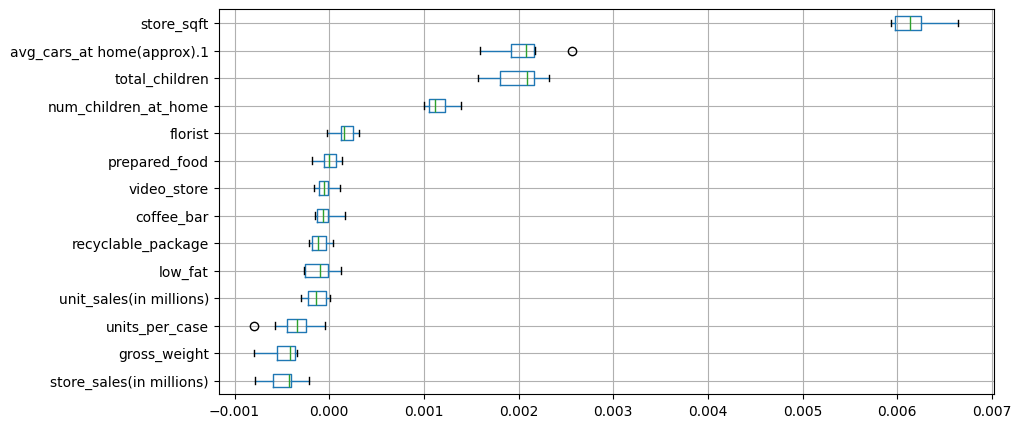

In [6]:
plot_importance(importance_df, figsize=(10, 5), kind="box")

In [7]:
def custom_metric(
    X_val, y_val, estimator, labels,
    X_train, y_train, weight_val=None, weight_train=None,
    *args,
):
    from sklearn.metrics import mean_squared_error
    import time

    start = time.time()
    y_pred = estimator.predict(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = mean_squared_error(y_val, y_pred, sample_weight=weight_val)
    y_pred = estimator.predict(X_train)
    train_loss = mean_squared_error(y_train, y_pred, sample_weight=weight_train)
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss,
        "train_loss": train_loss,
        "pred_time": pred_time,
    }

In [8]:
selected_features = [
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'low_fat',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'prepared_food',
 'florist',
]

In [9]:
X_df, y = train_df.loc[:, selected_features], train_df.loc[:, "cost"].values

In [10]:
from flaml.automl.automl import AutoML

settings = {
    "time_budget": 30, # time to spend to find the best model, in seconds
    "metric": custom_metric,
    "task": 'regression',
    "seed": 1,
    "verbose": 3,
    "estimator_list": ["lgbm", "xgboost", "catboost"]
}

automl = AutoML()
automl.fit(X_df, y, **settings)

[flaml.automl.logger: 12-17 14:56:47] {1728} INFO - task = regression
[flaml.automl.logger: 12-17 14:56:47] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 12-17 14:56:47] {1838} INFO - Minimizing error metric: customized metric
[flaml.automl.logger: 12-17 14:56:47] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'catboost']
[flaml.automl.logger: 12-17 14:56:47] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-17 14:56:47] {2393} INFO - Estimated sufficient time budget=8447s. Estimated necessary time budget=15s.
[flaml.automl.logger: 12-17 14:56:47] {2442} INFO -  at 0.3s,	estimator lgbm's best error=892.7966,	best estimator lgbm's best error=892.7966
[flaml.automl.logger: 12-17 14:56:47] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-17 14:56:47] {2442} INFO -  at 0.4s,	estimator lgbm's best error=882.9238,	best estimator lgbm's best error=882.9238
[flaml.automl.logger: 12-17 14:56:47] {2258} INFO - 

In [11]:
pseudo_labels = automl.predict(test_df.loc[:, selected_features])
pseudo_train = pd.concat([X_df, pd.DataFrame(test_df)], axis=0)
pseudo_labels = np.concatenate([y, pseudo_labels])

In [13]:
cat_model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.05,
    l2_leaf_reg=10,  # L2-регуляризация
    bagging_temperature=1.0,  # Случайность выборки
    random_strength=2.0,  # Случайный шум
    depth=6,  # Глубина деревьев
    min_data_in_leaf=10,  # Минимум объектов в листе
    verbose=200,
    random_state=42
)
cat_model.fit(pseudo_train, pseudo_labels)

0:	learn: 24.2171702	total: 35.2ms	remaining: 2m 55s
200:	learn: 22.5947889	total: 4.62s	remaining: 1m 50s
400:	learn: 22.2993669	total: 8.81s	remaining: 1m 41s
600:	learn: 22.1277439	total: 13.6s	remaining: 1m 39s
800:	learn: 22.0104105	total: 19.1s	remaining: 1m 40s
1000:	learn: 21.9281709	total: 25s	remaining: 1m 40s
1200:	learn: 21.8669418	total: 30.7s	remaining: 1m 37s
1400:	learn: 21.8170605	total: 36.1s	remaining: 1m 32s
1600:	learn: 21.7770948	total: 41.6s	remaining: 1m 28s
1800:	learn: 21.7408494	total: 47s	remaining: 1m 23s
2000:	learn: 21.7115902	total: 52.2s	remaining: 1m 18s
2200:	learn: 21.6849650	total: 57.3s	remaining: 1m 12s
2400:	learn: 21.6626219	total: 1m 2s	remaining: 1m 7s
2600:	learn: 21.6433962	total: 1m 7s	remaining: 1m 2s
2800:	learn: 21.6284152	total: 1m 13s	remaining: 58s
3000:	learn: 21.6132845	total: 1m 19s	remaining: 52.9s
3200:	learn: 21.6006054	total: 1m 25s	remaining: 48.2s
3400:	learn: 21.5881178	total: 1m 32s	remaining: 43.4s
3600:	learn: 21.5767356	

In [14]:
predicts = cat_model.predict(test_df)

In [15]:
ids = test_id.to_numpy()

data = {
    'id': list(ids),
    'cost': list(predicts)
}

pd.DataFrame(data).to_csv('baseline_subm.csv', index=False)